In [2]:
import sklearn, pickle, gzip
with gzip.open('../../data/20newsgroups.pkl.gz', 'rb') as f:
    newsgroups_train = pickle.load(f)

In [5]:
print newsgroups_train.target_names

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [3]:
print newsgroups_train.data[0]

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [7]:
print newsgroups_train.target_names[newsgroups_train.target[0]]

rec.autos


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(11314, 56124)

In [20]:
vectors[0]

<1x56124 sparse matrix of type '<type 'numpy.int64'>'
	with 52 stored elements in Compressed Sparse Row format>

In [21]:
print vectors[0]

  (0, 31590)	2
  (0, 53733)	2
  (0, 51668)	2
  (0, 20324)	2
  (0, 50060)	1
  (0, 13562)	5
  (0, 36726)	1
  (0, 40280)	1
  (0, 26716)	1
  (0, 41924)	1
  (0, 52029)	1
  (0, 33339)	1
  (0, 15247)	1
  (0, 38672)	1
  (0, 1412)	1
  (0, 54590)	1
  (0, 20972)	1
  (0, 44850)	1
  (0, 17594)	1
  (0, 19462)	1
  (0, 47446)	1
  (0, 32219)	1
  (0, 31247)	1
  (0, 5135)	1
  (0, 20117)	1
  :	:
  (0, 12395)	1
  (0, 19464)	1
  (0, 42368)	1
  (0, 46671)	1
  (0, 7903)	1
  (0, 12728)	1
  (0, 45544)	1
  (0, 43335)	1
  (0, 11933)	1
  (0, 30671)	1
  (0, 49708)	1
  (0, 34895)	1
  (0, 20933)	1
  (0, 47261)	1
  (0, 55583)	1
  (0, 40862)	1
  (0, 26364)	1
  (0, 28066)	1
  (0, 23697)	1
  (0, 32221)	1
  (0, 32914)	1
  (0, 49938)	1
  (0, 27454)	1
  (0, 12514)	1
  (0, 36256)	1


In [16]:
vectors.nnz / float(vectors.shape[0])

157.9958458546933

In [27]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=20, max_iter=5)
%time fit = lda.fit_transform(vectors)

CPU times: user 1min, sys: 10 ms, total: 1min
Wall time: 1min


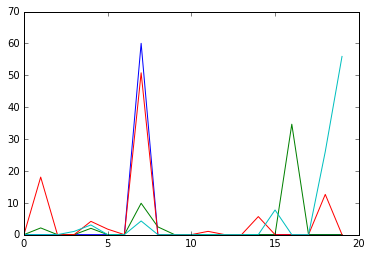

In [88]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(zip(fit[0], fit[1000], fit[2000], fit[3000]))
plt.show()

In [86]:
from sklearn import manifold
tsne = manifold.TSNE(n_components=2)
%time X_tsne = tsne.fit_transform(fit)

CPU times: user 3min 31s, sys: 13.8 s, total: 3min 44s
Wall time: 3min 45s


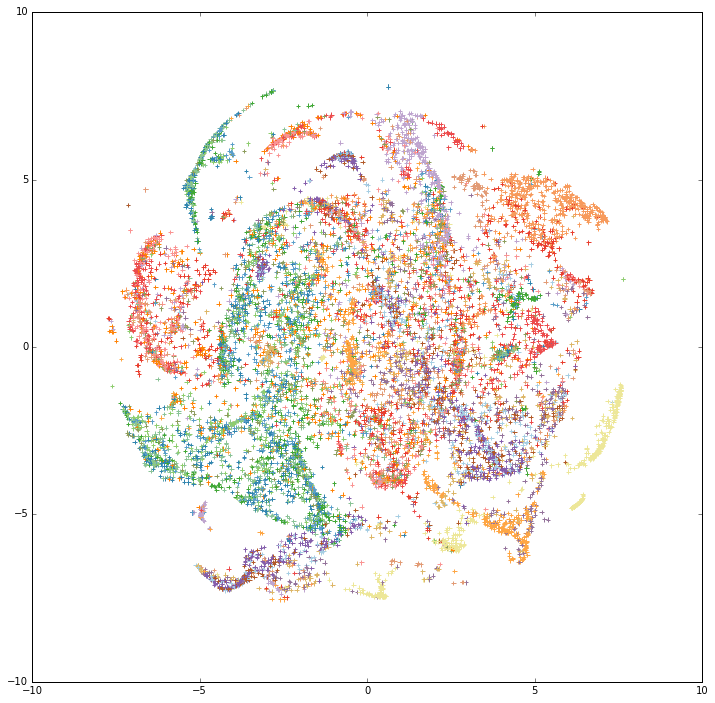

In [112]:
from matplotlib import cm
plt.figure(figsize=(12,12))
plt.scatter(X_tsne[:,0], X_tsne[:,1], marker='+', cmap=cm.Paired, c=newsgroups_train.target)
plt.show()